In [2]:
pip install transformers


     ---------------------------------------- 0.0/44.4 kB ? eta -:--:--
     ----------------- -------------------- 20.5/44.4 kB 320.0 kB/s eta 0:00:01
     ----------------------------------- -- 41.0/44.4 kB 326.8 kB/s eta 0:00:01
     -------------------------------------- 44.4/44.4 kB 310.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.7 MB 3.2 MB/s eta 0:00:04
   ---------------------------------------- 0.1/9.7 MB 1.2 MB/s eta 0:00:09
    --------------------------------------- 0.2/9.7 MB 2.0 MB/s eta 0:00:05
   - -------------------------------------- 0.3/9.7 MB 2.2 MB/s eta 0:00:05
   - -------------------------------------- 0.5/9.7 MB 2.3 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/9.7 MB 3.4 MB/s eta 0:00:03
   ---- ----------------------------------- 1.1/9.7 MB 3.8 MB/s eta 0:00:03
   -------- ------------------------------- 2.0/9.7 MB 6.2 MB/s eta 0:00:02
   --------

In [1]:
pip install tf-keras


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# Makine Öğrenimi Modelleri
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Yapay Sinir Ağları ve Derin Öğrenme
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional, GRU, Conv1D, GlobalMaxPooling1D

# Transformer ve BERT
from transformers import BertTokenizer, TFBertForSequenceClassification


In [2]:
# Veri setini yükleyin
df = pd.read_csv('dataset.csv')

# İlk birkaç satırı inceleyin
df.head()


,category,text
0,siyaset,3 milyon ile ön seçim vaadi mhp nin 10 olağan...
1,siyaset,mesut_yılmaz yüce_divan da ceza alabilirdi pr...
2,siyaset,disko lar kaldırılıyor başbakan_yardımcısı ar...
3,siyaset,sarıgül anayasa_mahkemesi ne gidiyor mustafa_...
4,siyaset,erdoğan idamın bir haklılık sebebi var demek ...


In [3]:
df.info()
print("***************************")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4900 entries, 0 to 4899
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  4900 non-null   object
 1   text      4900 non-null   object
dtypes: object(2)
memory usage: 76.7+ KB
***************************
category    0
text        0
dtype: int64


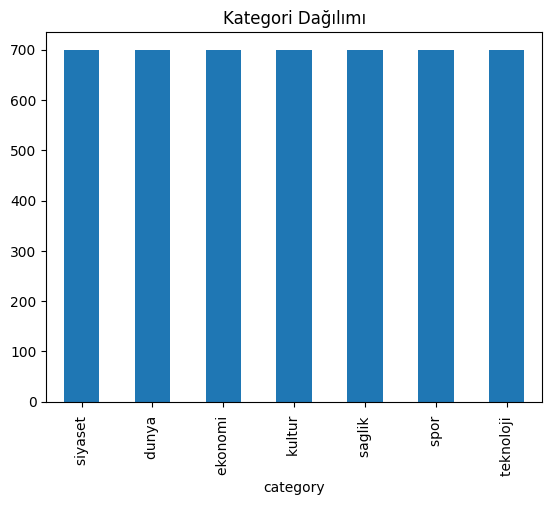

In [4]:
df['category'].value_counts().plot(kind='bar', title='Kategori Dağılımı')
plt.show()



In [ ]:
# Gerekli kütüphanelerin yüklenmesi
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string

# NLTK'nin gerekli modüllerini indiriyoruz
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Tokenizer, Lemmatizer ve Stopword listesi
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Veri ön işleme fonksiyonu
def preprocess_text(text):
    # Küçük harfe çevirme
    text = text.lower()
    # Noktalama işaretlerini kaldırma
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenization
    tokens = word_tokenize(text)
    # Lemmatization ve Stopword'lerin kaldırılması
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Tokenleri birleştirerek metni yeniden oluşturma
    return ' '.join(tokens)

# Dataset'i yükleme
import pandas as pd

# Dataset'i okuyalım
df = pd.read_csv("dataset.csv")

# İşlenmiş metni yeni bir sütuna ekleyelim
df['processed_text'] = df['text'].apply(preprocess_text)

# İşlemi kontrol edelim
print(df[['text', 'processed_text']].head())
df.to_csv("ready_txt.csv", index=False)

[nltk_data] Downloading package punkt to C:\Users\Baki
[nltk_data]     Akgun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Baki
[nltk_data]     Akgun\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Baki
[nltk_data]     Akgun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                text  \
0   3 milyon ile ön seçim vaadi mhp nin 10 olağan...   
1   mesut_yılmaz yüce_divan da ceza alabilirdi pr...   
2   disko lar kaldırılıyor başbakan_yardımcısı ar...   
3   sarıgül anayasa_mahkemesi ne gidiyor mustafa_...   
4   erdoğan idamın bir haklılık sebebi var demek ...   

                                      processed_text  
0  3 milyon ile ön seçim vaadi mhp nin 10 olağan ...  
1  mesutyılmaz yücedivan da ceza alabilirdi prof ...  
2  disko lar kaldırılıyor başbakanyardımcısı arın...  
3  sarıgül anayasamahkemesi ne gidiyor mustafasar...  
4  erdoğan idamın bir haklılık sebebi var demek k...  


In [9]:
df = pd.read_csv("ready_txt.csv")


In [11]:
from sklearn.feature_extraction.text import CountVectorizer

# BoW Vektörizer
bow_vectorizer = CountVectorizer(max_features=5000)  # En sık kullanılan 5000 kelime
X_bow = bow_vectorizer.fit_transform(df['processed_text'])

# İlk 10 kelime özelliği
print("BoW Özellikleri:", bow_vectorizer.get_feature_names_out()[:10])
print("BoW Şekli:", X_bow.shape)


BoW Özellikleri: ['00' '000' '01' '03' '04' '05' '06' '07' '08' '09']
BoW Şekli: (4900, 5000)


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vektörizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_text'])

# İlk 10 kelime özelliği
print("TF-IDF Özellikleri:", tfidf_vectorizer.get_feature_names_out()[:10])
print("TF-IDF Şekli:", X_tfidf.shape)


TF-IDF Özellikleri: ['00' '000' '01' '03' '04' '05' '06' '07' '08' '09']
TF-IDF Şekli: (4900, 5000)


In [13]:
from gensim.models import Word2Vec

# Tokenize edilmiş metinler için ön hazırlık
tokenized_text = [word_tokenize(text) for text in df['processed_text']]

# Word2Vec Modeli
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=2, workers=4)

# Örnek kelime vektörü
example_word = "data"
if example_word in word2vec_model.wv:
    print(f"'{example_word}' kelimesinin vektörü:", word2vec_model.wv[example_word])
else:
    print(f"'{example_word}' kelimesi modelde bulunamadı.")


'data' kelimesinin vektörü: [-0.03145713  0.01956003 -0.01405979  0.03806569 -0.02749941 -0.04706255
  0.07086787  0.1602399  -0.12560378  0.01572631 -0.07025719 -0.08314411
 -0.02140102  0.06390858 -0.04685908 -0.00583593  0.00338103 -0.00324999
 -0.01745734 -0.08742492  0.02945179  0.04264445  0.08332413 -0.03584374
 -0.00400523 -0.03036286 -0.06469779 -0.03358594 -0.05304997  0.02370426
  0.06034151  0.01921605  0.05806318 -0.0343489  -0.02561706  0.08847605
  0.03145593 -0.02515345 -0.0458701  -0.06685296  0.08189382 -0.04194683
 -0.08490007  0.05575208  0.04668449  0.0038897  -0.07648154  0.0009842
  0.03263596  0.06054982 -0.00293891 -0.08352628 -0.02924451  0.02095271
 -0.03582131  0.06947504  0.01249651 -0.05664888 -0.03357241  0.05069476
  0.01008211  0.0010141  -0.00055176 -0.04311021 -0.02916637  0.0164354
 -0.06262702  0.04732872 -0.06125431  0.01482008 -0.03823828  0.04040443
  0.09820182 -0.05579188  0.05843121  0.05502952  0.0481199  -0.02104057
 -0.00399381 -0.0499537  

In [14]:
df.head()

,category,text,processed_text
0,siyaset,3 milyon ile ön seçim vaadi mhp nin 10 olağan...,3 milyon ile ön seçim vaadi mhp nin 10 olağan ...
1,siyaset,mesut_yılmaz yüce_divan da ceza alabilirdi pr...,mesutyılmaz yücedivan da ceza alabilirdi prof ...
2,siyaset,disko lar kaldırılıyor başbakan_yardımcısı ar...,disko lar kaldırılıyor başbakanyardımcısı arın...
3,siyaset,sarıgül anayasa_mahkemesi ne gidiyor mustafa_...,sarıgül anayasamahkemesi ne gidiyor mustafasar...
4,siyaset,erdoğan idamın bir haklılık sebebi var demek ...,erdoğan idamın bir haklılık sebebi var demek k...


## Traditional Models

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [27]:
# Özellikler ve hedef değişken
X = X_tfidf  # TF-IDF özelliklerini kullanıyoruz
y = df['category']  # Hedef sütun

# Train-Test ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
)

def evaluate_model(y_test, y_pred, y_proba, model_name, label_encoder):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, y_proba, multi_class="ovr")
    
    print(f"--- {model_name} Performance ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()



--- Random Forest Performance ---
Accuracy: 0.8561
Precision: 0.8573
Recall: 0.8561
F1-Score: 0.8560
AUC: 0.9812


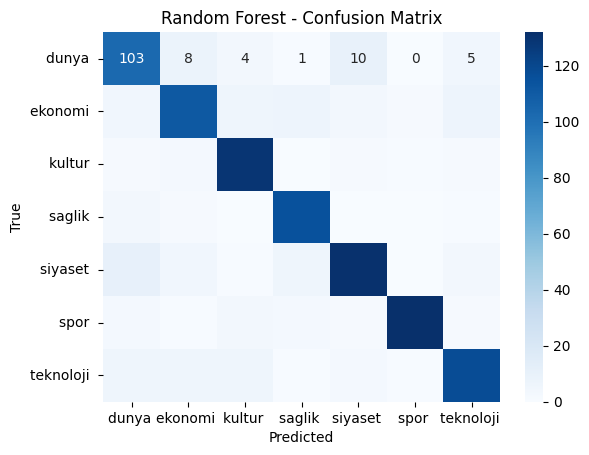

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Tahminler
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)

# Performans
evaluate_model(y_test, y_pred_rf, y_proba_rf, "Random Forest", label_encoder)


--- XGBoost Performance ---
Accuracy: 0.8571
Precision: 0.8585
Recall: 0.8571
F1-Score: 0.8572
AUC: 0.9779


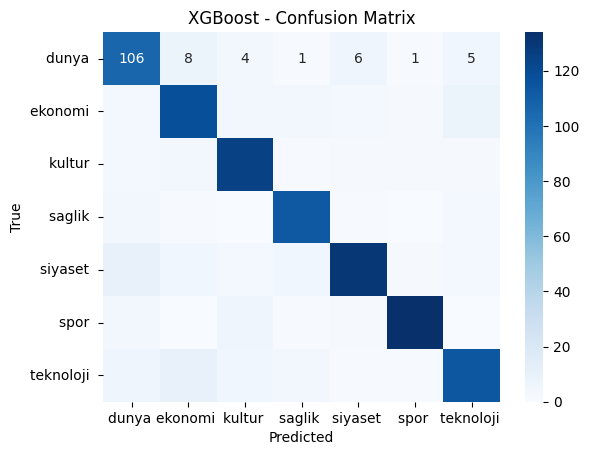

In [36]:
from xgboost import XGBClassifier

from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

# Hedef değişkeni encode etme
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['category'])

# Train-Test ayırma
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)


# Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Tahminler
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)

# Performans
evaluate_model(y_test, y_pred_xgb, y_proba_xgb, "XGBoost", label_encoder)




In [15]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

# Hedef değişkeni encode etme
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['category'])

# Train-Test ayırma
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.038644 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 130155
[LightGBM] [Info] Number of data points in the train set: 3920, number of used features: 4482
[LightGBM] [Info] Start training from score -1.929966
[LightGBM] [Info] Start training from score -1.949488
[LightGBM] [Info] Start training from score -1.944126
[LightGBM] [Info] Start training from score -1.914273
[LightGBM] [Info] Start training from score -1.978581
[LightGBM] [Info] Start training from score -1.958489
[LightGBM] [Info] Start training from score -1.947697
--- LightGBM Performance ---
Accuracy: 0.8806
Precision: 0.8832
Recall: 0.8806
F1-Score: 0.8811
AUC: 0.9848


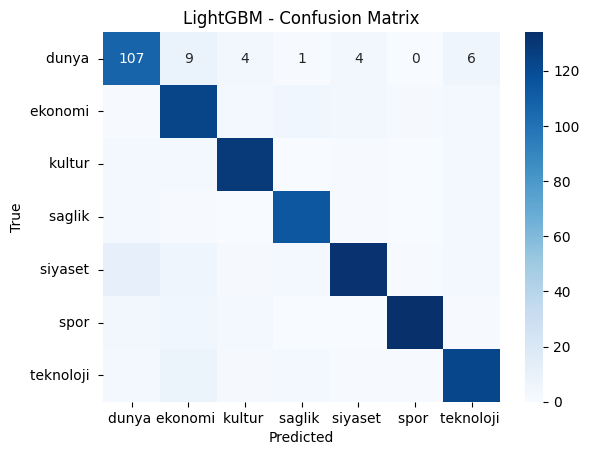

In [ ]:
from lightgbm import LGBMClassifier

# Model
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# Tahminler
y_pred_lgb = lgb_model.predict(X_test)
y_proba_lgb = lgb_model.predict_proba(X_test)

# Performans
evaluate_model(y_test, y_pred_lgb, y_proba_lgb, "LightGBM", label_encoder)

add_to_results("LightGBM", y_test, y_pred_lgb, y_proba_lgb)



In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Model
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ann_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Tahminler
y_proba_ann = ann_model.predict(X_test)
y_pred_ann = y_proba_ann.argmax(axis=1)

# Performans



Epoch 1/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5354 - loss: 1.6309
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9498 - loss: 0.2284
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9915 - loss: 0.0511
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9993 - loss: 0.0175
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9989 - loss: 0.0104
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9994 - loss: 0.0061
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9996 - loss: 0.0044
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9990 - loss: 0.0057
Epoch 9/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9995 - loss: 0.0026
Epoch 10/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9998 - loss: 0.0021
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [73]:
# Tabloda her değeri 4 ondalık basamakla göster
pd.options.display.float_format = "{:.4f}".format

results_df.to_csv("model_performance_results.csv", index=False)
results_df

,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,Random Forest,0.8561,0.8573,0.8561,0.8560,0.9812
1,XGBoost,0.8571,0.8585,0.8571,0.8572,0.9779
2,LightGBM,0.8806,0.8832,0.8806,0.8811,0.9848
3,ANN,0.9092,0.9103,0.9092,0.9093,0.9912


## Karmaşık Modeller

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense, Dropout, GlobalMaxPooling1D

# Modelin yapısını oluşturuyoruz
model = Sequential()

# Word2Vec gömülüleri veya rastgele başlatılan gömülüleri ekliyoruz
embedding_layer = Embedding(input_dim=len(bow_vectorizer.get_feature_names_out()), 
                            output_dim=50,  # Gömülü boyutunu da azaltıyoruz
                            input_length=X_bow.shape[1])
model.add(embedding_layer)

# CNN Katmanı
model.add(Conv1D(64, 3, activation='relu'))  # Daha az filtre ve daha küçük kernel boyutu
model.add(MaxPooling1D(pool_size=2))

# BiLSTM Katmanı
model.add(Bidirectional(LSTM(64, return_sequences=False)))  # Daha az nöron ve tek yönlü çıktı

# Fully Connected (Dense) Katmanı
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Dropout oranını koruyoruz

# Çıkış Katmanı
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Modeli derliyoruz
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

# Modeli eğitiyoruz
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


c:\Users\Baki Akgun\New Folder\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 346s 5s/step - accuracy: 0.1429 - loss: 1.9470 - val_accuracy: 0.1612 - val_loss: 1.9450
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 354s 6s/step - accuracy: 0.1292 - loss: 1.9472 - val_accuracy: 0.1418 - val_loss: 1.9469
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 346s 6s/step - accuracy: 0.1364 - loss: 1.9461 - val_accuracy: 0.1245 - val_loss: 1.9482
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 338s 5s/step - accuracy: 0.1433 - loss: 1.9459 - val_accuracy: 0.1245 - val_loss: 1.9470
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 335s 5s/step - accuracy: 0.1465 - loss: 1.9455 - val_accuracy: 0.1245 - val_loss: 1.9470
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 355s 6s/step - accuracy: 0.1536 - loss: 1.9462 - val_accuracy: 0.1245 - val_loss: 1.9472
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 393s 6s/step - accuracy: 0.1270 - loss: 1.9465 - val_accuracy: 0.1245 - val_loss: 1.9466
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 349s 6s/step - accuracy: 0.1515 - loss: 1.9458 - val_accuracy: 0.1245 - v

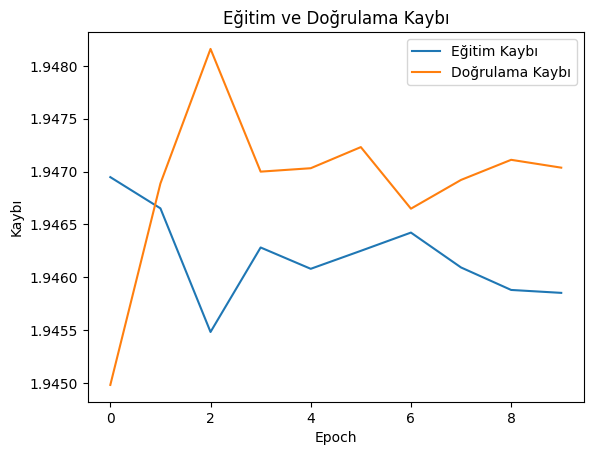

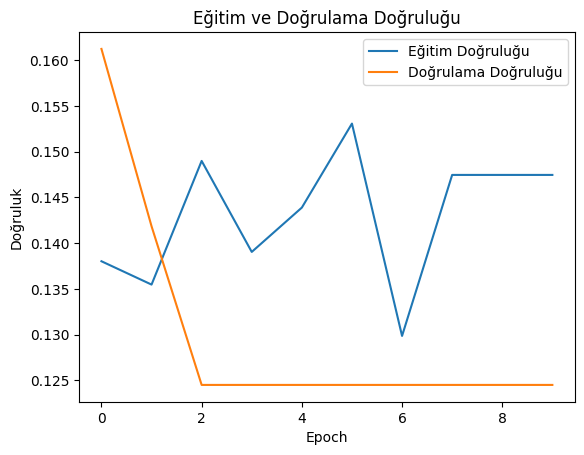

Eğitim Kaybı: 1.9459
Doğrulama Kaybı: 1.9470
Eğitim Doğruluğu: 0.1474
Doğrulama Doğruluğu: 0.1245


In [28]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama kaybını çizme
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kaybı')
plt.legend()
plt.show()

# Eğitim ve doğrulama doğruluğunu çizme
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

# Modelin doğruluk ve kayıp metriklerini yazdırma
print(f"Eğitim Kaybı: {history.history['loss'][-1]:.4f}")
print(f"Doğrulama Kaybı: {history.history['val_loss'][-1]:.4f}")
print(f"Eğitim Doğruluğu: {history.history['accuracy'][-1]:.4f}")
print(f"Doğrulama Doğruluğu: {history.history['val_accuracy'][-1]:.4f}")


In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Bidirectional, GRU, Dense, Dropout, GlobalMaxPooling1D

# Modelin yapısını oluşturuyoruz
model = Sequential()

# Word2Vec gömülüleri veya rastgele başlatılan gömülüleri ekleyelim
embedding_layer = Embedding(input_dim=len(bow_vectorizer.get_feature_names_out()), 
                            output_dim=100, 
                            input_length=X_bow.shape[1])

model.add(embedding_layer)

# CNN Katmanı
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# LSTM Katmanı
model.add(LSTM(100, return_sequences=True))

# BiLSTM Katmanı
model.add(Bidirectional(LSTM(100, return_sequences=True)))

# GRU Katmanı
model.add(GRU(100, return_sequences=True))

# Global Pooling Katmanı
model.add(GlobalMaxPooling1D())

# Fully Connected (Dense) Katmanı
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Overfitting'i önlemek için dropout ekliyoruz

# Çıkış Katmanı
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Modeli derleyelim
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

# Modeli eğitelim
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


NameError: name 'label_encoder' is not defined

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, GlobalMaxPooling1D
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping

# Etiketleri LabelEncoder ile integer formatına dönüştürme
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)  # Etiketleri integer formata dönüştür
y_test = label_encoder.transform(y_test)


# Modelin yapısını oluşturuyoruz
model = Sequential()

# Embedding Katmanı
embedding_layer = Embedding(input_dim=len(bow_vectorizer.get_feature_names_out()), 
                            output_dim=50,  # Daha küçük bir boyut
                            input_length=X_bow.shape[1])
model.add(embedding_layer)

# CNN Katmanı
model.add(Conv1D(128, 5, activation='relu'))  # Daha az filtre
model.add(MaxPooling1D(pool_size=2))

# LSTM Katmanı
model.add(LSTM(64, return_sequences=False))  # 2D çıktı (return_sequences=False)

# Dense Katmanı
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Overfitting'i önlemek için

# Çıkış Katmanı
model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Sınıf sayısı kadar çıkış

# Modeli derleme
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

# Early Stopping ile eğitimi izleme
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Modeli eğitme
history = model.fit(X_train, y_train, 
                    epochs=10, 
                    batch_size=64, 
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stopping])

# Performans metriklerini hesaplama
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Tahminler
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# Metrikleri hesaplama
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Eğitim ve doğrulama kaybını görselleştirme
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 1/10


c:\Users\Baki Akgun\New Folder\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


62/62 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.1495 - loss: 1.9473 - val_accuracy: 0.1418 - val_loss: 1.9471
Epoch 2/10
59/62 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.1477 - loss: 1.9461

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Conv1D, MaxPooling1D, Bidirectional, Dense, Dropout, GlobalMaxPooling1D
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Model 1: CNN
cnn_model = Sequential([
    Embedding(input_dim=len(bow_vectorizer.get_feature_names_out()), output_dim=50, input_length=X_train.shape[1]),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(pool_size=2),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Model 2: LSTM
lstm_model = Sequential([
    Embedding(input_dim=len(bow_vectorizer.get_feature_names_out()), output_dim=50, input_length=X_train.shape[1]),
    LSTM(64, return_sequences=False),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Model 3: GRU
gru_model = Sequential([
    Embedding(input_dim=len(bow_vectorizer.get_feature_names_out()), output_dim=50, input_length=X_train.shape[1]),
    GRU(64, return_sequences=False),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Model 4: BiLSTM
bilstm_model = Sequential([
    Embedding(input_dim=len(bow_vectorizer.get_feature_names_out()), output_dim=50, input_length=X_train.shape[1]),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Ensembling Model (tüm modelleri birleştiriyoruz)
# Input layer, her modelin çıktısı burada birleşiyor
input_layer = Input(shape=(X_train.shape[1],))

cnn_output = cnn_model(input_layer)
lstm_output = lstm_model(input_layer)
gru_output = gru_model(input_layer)
bilstm_output = bilstm_model(input_layer)

# Concatenate tüm çıkışları
ensemble_output = concatenate([cnn_output, lstm_output, gru_output, bilstm_output])

# Final dense layer (birleştirilen katmanlardan nihai sınıflandırma yapıyoruz)
ensemble_model = Model(inputs=input_layer, outputs=Dense(len(label_encoder.classes_), activation='softmax')(ensemble_output))

# Modeli derliyoruz
ensemble_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early Stopping ile erken durdurma
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Ensemble modelini eğitelim
ensemble_model.fit(X_train, y_train, epochs=10, batch_size=8, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Tahminler
y_proba_ensemble = ensemble_model.predict(X_test)
y_pred_ensemble = y_proba_ensemble.argmax(axis=1)

# Performans
accuracy = accuracy_score(y_test, y_pred_ensemble)
precision = precision_score(y_test, y_pred_ensemble, average='weighted')
recall = recall_score(y_test, y_pred_ensemble, average='weighted')
f1 = f1_score(y_test, y_pred_ensemble, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Epoch 1/10
 1/62 ━━━━━━━━━━━━━━━━━━━━ 57:24 56s/step - accuracy: 0.1719 - loss: 1.9643

## Bert Model

In [17]:
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
from sklearn.metrics import accuracy_score

# Tokenizer ve BERT Modeli
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = TFBertForSequenceClassification.from_pretrained('savasy/bert-turkish-text-classification')

# Veriyi BERT için uygun hale getirme
def encode(text):
    return tokenizer(list(text), padding=True, truncation=True, max_length=256, return_tensors='tf')

# Veriyi hazırlama
df['processed_text'] = df['processed_text'].fillna('').astype(str)

# Eğitim ve doğrulama verilerini encode etme
train_encodings = encode(df['processed_text'])  # Training data encoding
train_labels = tf.convert_to_tensor(y_train)  # Labels for training

val_encodings = encode(df['processed_text'])  # Validation data encoding
val_labels = tf.convert_to_tensor(y_test)    # Labels for validation

# Modeli derleme (compile) with correct import path
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),  # Use tf.keras for optimizer
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Loss function
              metrics=['accuracy'])  # Metrics

# Modeli eğitme
history = model.fit(
    train_encodings['input_ids'], 
    train_labels, 
    epochs=3, 
    batch_size=8, 
    validation_data=(val_encodings['input_ids'], val_labels)
)

# Modeli değerlendirme
predictions = model.predict(val_encodings['input_ids'])
pred_labels = tf.argmax(predictions.logits, axis=1)

accuracy = accuracy_score(y_test, pred_labels)
print(f'BERT Accuracy: {accuracy:.4f}')


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

All the weights of TFBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


ValueError: Could not interpret optimizer identifier: <keras.src.optimizers.adam.Adam object at 0x00000267236D68D0>

In [20]:
pip install --upgrade tensorflow


Note: you may need to restart the kernel to use updated packages.


In [21]:
# 1. Install Required Libraries
# Ensure you have the necessary libraries installed
# pip install transformers tensorflow scikit-learn

# 2. Import Libraries
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['processed_text'], df['category'], test_size=0.2, random_state=42)

# 4. Tokenize the Text Data
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

def encode(texts):
    return tokenizer(texts.tolist(), padding=True, truncation=True, max_length=256, return_tensors='tf')

train_encodings = encode(X_train)
test_encodings = encode(X_test)

# 5. Convert Labels to TensorFlow Tensors
train_labels = tf.convert_to_tensor(y_train)
test_labels = tf.convert_to_tensor(y_test)

# 6. Load the Pre-trained BERT Model
model = TFBertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=2)

# 7. Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# 8. Train the Model
history = model.fit(
    train_encodings['input_ids'],
    train_labels,
    epochs=3,
    batch_size=8,
    validation_data=(test_encodings['input_ids'], test_labels)
)

# 9. Evaluate the Model
predictions = model.predict(test_encodings['input_ids'])
pred_labels = tf.argmax(predictions.logits, axis=1)

accuracy = accuracy_score(y_test, pred_labels)
print(f'BERT Accuracy: {accuracy:.4f}')


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ValueError: Could not interpret optimizer identifier: <keras.src.optimizers.adam.Adam object at 0x0000026723373C90>

In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
from sklearn.metrics import accuracy_score

# Tokenizer ve BERT Modeli
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = TFBertForSequenceClassification.from_pretrained('savasy/bert-turkish-text-classification')

# Veriyi BERT için uygun hale getirme
def encode(text):
    return tokenizer(list(text), padding=True, truncation=True, max_length=256, return_tensors='tf')

# Veriyi hazırlama
df['processed_text'] = df['processed_text'].fillna('').astype(str)

# Eğitim ve doğrulama verilerini encode etme
train_encodings = encode(df['processed_text'])  # Training data encoding
train_labels = tf.convert_to_tensor(y_train)  # Labels for training

val_encodings = encode(df['processed_text'])  # Validation data encoding
val_labels = tf.convert_to_tensor(y_test)    # Labels for validation

# Modeli derleme (compile)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),  # Use tf.keras for optimizer
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Loss function
              metrics=['accuracy'])  # Metrics

# Modeli eğitme
history = model.fit(
    train_encodings['input_ids'], 
    train_labels, 
    epochs=3, 
    batch_size=8, 
    validation_data=(val_encodings['input_ids'], val_labels)
)

# Modeli değerlendirme
predictions = model.predict(val_encodings['input_ids'])
pred_labels = tf.argmax(predictions.logits, axis=1)

accuracy = accuracy_score(y_test, pred_labels)
print(f'BERT Accuracy: {accuracy:.4f}')


In [18]:
# 1. Gerekli Kütüphanelerin Kurulması
# pip install transformers tensorflow scikit-learn
import os
os.environ["TF_USE_LEGACY_KERAS"] = "1"

# 2. Kütüphaneleri İçe Aktarma
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd


# Veriyi eğitim ve test setlerine ayırıyoruz
X_train, X_test, y_train, y_test = train_test_split(df['processed_text'], df['category'], test_size=0.2, random_state=42)

# 3. Metin Verisini Tokenize Etme
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

def encode(texts):
    return tokenizer(texts.tolist(), padding=True, truncation=True, max_length=256, return_tensors='tf')

train_encodings = encode(X_train)
test_encodings = encode(X_test)

# 4. Etiketleri TensorFlow Tensors'a Dönüştürme
train_labels = tf.convert_to_tensor(y_train)
test_labels = tf.convert_to_tensor(y_test)

# 5. Önceden Eğitilmiş BERT Modelini Yükleme
model = TFBertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=2)

# 6. Modeli Derlemek
model.compile(optimizer=keras.optimizers.Adam(learning_rate=5e-5),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 7. Modeli Eğitme ve EarlyStopping Ekleyerek Overfitting'i Engelleme
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(
    train_encodings['input_ids'],
    train_labels,
    epochs=5,  # Epoch sayısını artırdık
    batch_size=8,
    validation_data=(test_encodings['input_ids'], test_labels),
    callbacks=[early_stopping]  # Overfitting'i engellemek için erken durdurma ekledik
)

# 8. Modeli Değerlendirme
predictions = model.predict(test_encodings['input_ids'])
pred_labels = tf.argmax(predictions.logits, axis=1)

accuracy = accuracy_score(y_test, pred_labels)
print(f'BERT Modeli Doğruluğu: {accuracy:.4f}')

# 9. Sonuçları Görselleştirme (Eğitim ve Doğrulama Kaybı/Doğruluk)
import matplotlib.pyplot as plt

# Eğitim ve doğrulama doğruluğu
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

# Eğitim ve doğrulama kaybı
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kaybı')
plt.legend()
plt.show()


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


NameError: name 'keras' is not defined

In [21]:
# 1. Gerekli Kütüphanelerin Kurulması
# pip install transformers tensorflow scikit-learn
import os
os.environ["TF_USE_LEGACY_KERAS"] = "1"

# 2. Kütüphaneleri İçe Aktarma
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Veriyi eğitim ve test setlerine ayırıyoruz
X_train, X_test, y_train, y_test = train_test_split(df['processed_text'], df['category'], test_size=0.2, random_state=42)

# 3. Metin Verisini Tokenize Etme
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

def encode(texts):
    return tokenizer(texts.tolist(), padding=True, truncation=True, max_length=256, return_tensors='tf')

train_encodings = encode(X_train)
test_encodings = encode(X_test)

# 4. Etiketleri TensorFlow Tensors'a Dönüştürme
train_labels = tf.convert_to_tensor(y_train)
test_labels = tf.convert_to_tensor(y_test)

# 5. Önceden Eğitilmiş BERT Modelini Yükleme
model = TFBertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=2)

# 6. Modeli Derlemek
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 7. Modeli Eğitme ve EarlyStopping Ekleyerek Overfitting'i Engelleme
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(
    train_encodings['input_ids'],
    train_labels,
    epochs=5,  # Epoch sayısını artırdık
    batch_size=8,
    validation_data=(test_encodings['input_ids'], test_labels),
    callbacks=[early_stopping]  # Overfitting'i engellemek için erken durdurma ekledik
)

# 8. Modeli Değerlendirme
predictions = model.predict(test_encodings['input_ids'])
pred_labels = tf.argmax(predictions.logits, axis=1)

accuracy = accuracy_score(y_test, pred_labels)
print(f'BERT Modeli Doğruluğu: {accuracy:.4f}')

# 9. Sonuçları Görselleştirme (Eğitim ve Doğrulama Kaybı/Doğruluk)
import matplotlib.pyplot as plt

# Eğitim ve doğrulama doğruluğu
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

# Eğitim ve doğrulama kaybı
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kaybı')
plt.legend()
plt.show()


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ValueError: Could not interpret optimizer identifier: <keras.src.optimizers.adam.Adam object at 0x00000206140F7A90>

In [3]:
import tensorflow
tensorflow.__version__

'2.18.0'

In [20]:
import keras
keras.__version__

'3.7.0'

In [7]:
pip install keras==3.7.0


  Using cached keras-3.7.0-py3-none-any.whl.metadata (5.8 kB)
Using cached keras-3.7.0-py3-none-any.whl (1.2 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
Note: you may need to restart the kernel to use updated packages.
